In [30]:
!unzip -uq "/content/drive/My Drive/train" -d 

error:  must specify directory to which to extract with -d option


In [31]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import ImageFile
import tensorflow as tf
from keras.layers import *
from keras.optimizers import *
from keras.applications import *
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import backend as k

In [32]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
nb_classes = 3  # number of classes
img_width, img_height = 299, 299  # change based on the shape/structure of your images
batch_size = 32  # try 4, 8, 16, 32, 64, 128, 256 dependent on CPU/GPU memory capacity (powers of 2 values).
transformation_ratio = .05  # how aggressive will be the data augmentation/transformation

train_data_dir = "/content/drive/My Drive/train/train"
validation_data_dir = "/content/drive/My Drive/test/test"

In [33]:
base_model = Xception(input_shape=(img_width, img_height, 3), weights='imagenet', include_top=False)

In [34]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(nb_classes, activation='softmax')(x)

In [35]:
model = Model(base_model.input, predictions)
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [36]:
for layer in base_model.layers:
    layer.trainable = False

In [37]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=transformation_ratio,
                                   shear_range=transformation_ratio,
                                   zoom_range=transformation_ratio,
                                   cval=transformation_ratio,
                                   horizontal_flip=True,
                                   vertical_flip=True)

validation_datagen = ImageDataGenerator(rescale=1. / 255)

In [38]:
os.makedirs(os.path.join(os.path.abspath(train_data_dir), '../preview'), exist_ok=True)
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

Found 1034 images belonging to 3 classes.


In [39]:
validation_generator = validation_datagen.flow_from_directory(validation_data_dir,
                                                              target_size=(img_width, img_height),
                                                              batch_size=batch_size,
                                                              class_mode='categorical')

Found 128 images belonging to 3 classes.


In [40]:
model.compile(optimizer='nadam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [41]:
callbacks_list = [
    EarlyStopping(monitor='accuracy', 
                  patience=5,  # Number of epochs with no improvement after which training will be stopped.
                  verbose=0)
]

In [42]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
history = model.fit_generator(train_generator,
                    steps_per_epoch=train_generator.n // batch_size,
                    epochs=60,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.n // batch_size,
                    verbose=1,
                    callbacks=callbacks_list)

Epoch 1/60
32/32 [==============================] - 29s 912ms/step - loss: 0.8976 - accuracy: 0.6484 - val_loss: 0.7208 - val_accuracy: 0.7500
Epoch 2/60
32/32 [==============================] - 29s 898ms/step - loss: 0.6702 - accuracy: 0.7565 - val_loss: 0.6052 - val_accuracy: 0.7812
Epoch 3/60
32/32 [==============================] - 29s 900ms/step - loss: 0.5612 - accuracy: 0.8044 - val_loss: 0.5444 - val_accuracy: 0.8281
Epoch 4/60
32/32 [==============================] - 29s 894ms/step - loss: 0.5026 - accuracy: 0.8174 - val_loss: 0.5096 - val_accuracy: 0.8359
Epoch 5/60
32/32 [==============================] - 29s 909ms/step - loss: 0.4721 - accuracy: 0.8473 - val_loss: 0.4844 - val_accuracy: 0.8594
Epoch 6/60
32/32 [==============================] - 28s 890ms/step - loss: 0.4339 - accuracy: 0.8623 - val_loss: 0.4641 - val_accuracy: 0.8359
Epoch 7/60
32/32 [==============================] - 28s 885ms/step - loss: 0.4124 - accuracy: 0.8583 - val_loss: 0.4376 - val_accuracy: 0.8672

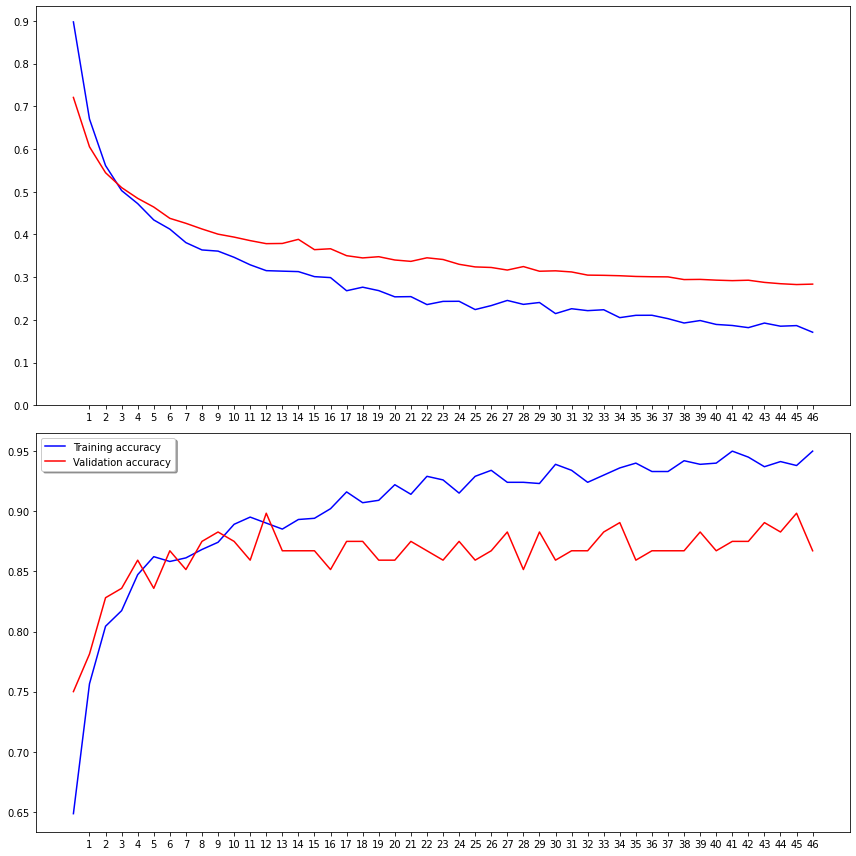

In [44]:
epochs = 47
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()